In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../data/Pokemon.csv')

In [7]:
df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [8]:
df['Legendary'].values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Type 1'] = label_encoder.fit_transform(df['Type 1'])
columns = ['Type 1', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
df = df[columns]
df

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,318,45,49,49,65,65,45,1,False
1,9,405,60,62,63,80,80,60,1,False
2,9,525,80,82,83,100,100,80,1,False
3,9,625,80,100,123,122,120,80,1,False
4,6,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,15,600,50,100,150,100,150,50,6,True
796,15,700,50,160,110,160,110,110,6,True
797,14,600,80,110,60,150,130,70,6,True
798,14,680,80,160,60,170,130,80,6,True


In [18]:
X = df.drop("Legendary", axis=1).values
y = df["Legendary"].values
sc = MinMaxScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (560, 9) (560,)
Test set: (240, 9) (240,)


In [19]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([3.12773930e-01, 2.66756351e-01, 2.40391438e-01, 6.53861564e-02,
       4.97860866e-02, 3.45262303e-02, 1.77305351e-02, 1.26492729e-02,
       1.15827299e-16])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (13,) and arg 1 with shape (9,).

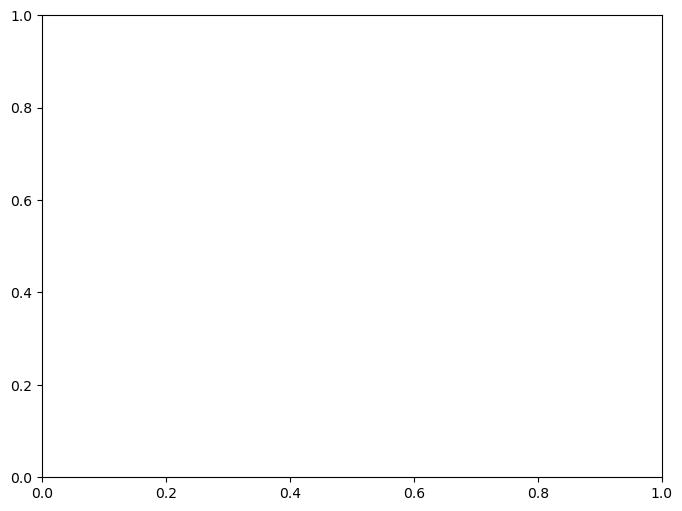

In [20]:
plt.figure(figsize=(8,6))
plt.bar(range(1, 14), pca.explained_variance_ratio_)
plt.ylabel('Varianza explicada')
plt.xlabel('PCA Index')
plt.show()